# kampus recruitement

- sl_no = Serial Number
- Gender- Male='M',Female='F'
- ssc_p: Secondary Education percentage- 10th Grade
- ssc_b: Board of Education- Central/ Others
- hsc_p: Higher Secondary Education percentage- 12th Grade
- hsc_b: Board of Education- Central/ Others
- hsc_s: Specialization in Higher Secondary Education
- degree_p: Degree Percentage
- degree_t: Under Graduation(Degree type)- Field of degree education
- workex: Work Experience
- etest_p: Employability test percentage ( conducted by college)
- specialisation: Post Graduation(MBA)- Specialization
- mba_p: MBA percentage
- status: Status of placement- Placed/Not placed
- salary: Salary offered by corporate to candidates'

ini penjelasan kolomnya

## buat latihan exploratory data analysis saja
### Questions
- Which factor influenced a candidate in getting placed?
- Does percentage matters for one to get placed?
- Which degree specialization is much demanded by corporate?

data ini intinya ingin mengetahui, karakteristik murid seperti apa yg akhirnya ketika lulus, bisa diterima kerja


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cr=pd.read_csv('campus_recruitment.csv.csv')
cr.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
cr.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [5]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [6]:
cr_byStatus=cr.groupby('status')
cr_byStatus.describe()

sl_no                                                           \
            count        mean        std  min    25%    50%     75%    max   
status                                                                       
Not Placed   67.0  110.477612  65.859667  4.0  48.50  107.0  170.50  215.0   
Placed      148.0  106.878378  60.682502  1.0  57.75  108.5  153.25  214.0   

            ssc_p             ...   mba_p        salary                 \
            count       mean  ...     75%    max  count           mean   
status                        ...                                        
Not Placed   67.0  57.544030  ...  65.405  75.71    0.0            NaN   
Placed      148.0  71.721486  ...  66.760  77.89  148.0  288655.405405   

                                                                           
                    std       min       25%       50%       75%       max  
status                                                                     
Not Placed          NaN       NaN       NaN       NaN       NaN       NaN  
Placed      93457.45242  200000.0  240000.0  265000.0  300000.0  940000.0  

[2 rows x 56 columns]

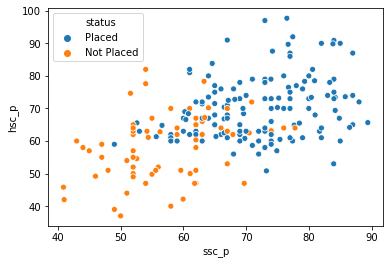

In [7]:
sns.scatterplot(cr['ssc_p'],cr['hsc_p'],hue=cr['status'])

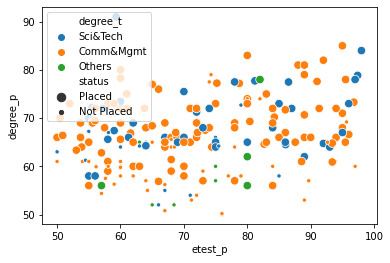

In [8]:
sns.scatterplot(y=cr['degree_p'],x=cr['etest_p'],hue=cr['degree_t'],size=cr['status'])

In [9]:
cr_byDegreeT=cr.groupby('degree_t')
cr_byDegreeT.get_group('Others')

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
34,35,M,62.0,Others,51.0,Others,Science,52.00,Others,No,68.44,Mkt&HR,62.77,Not Placed,NaN
42,43,M,49.0,Others,39.0,Central,Science,65.00,Others,No,63.00,Mkt&Fin,51.21,Not Placed,NaN
49,50,F,50.0,Others,37.0,Others,Arts,52.00,Others,No,65.00,Mkt&HR,56.11,Not Placed,NaN
87,88,M,59.6,Central,51.0,Central,Science,60.00,Others,No,75.00,Mkt&HR,59.08,Not Placed,NaN
124,125,M,67.0,Central,71.0,Central,Science,64.33,Others,Yes,64.00,Mkt&HR,61.26,Placed,250000.0
131,132,F,74.9,Others,57.0,Others,Science,62.00,Others,Yes,80.00,Mkt&Fin,60.78,Placed,360000.0
148,149,F,77.0,Central,86.0,Central,Arts,56.00,Others,No,57.00,Mkt&Fin,64.08,Placed,240000.0
182,183,M,52.0,Others,65.0,Others,Arts,57.00,Others,Yes,75.00,Mkt&Fin,59.81,Not Placed,NaN
185,186,F,88.0,Central,72.0,Central,Science,78.00,Others,No,82.00,Mkt&HR,71.43,Placed,252000.0
193,194,F,60.0,Central,63.0,Central,Arts,56.00,Others,Yes,80.00,Mkt&HR,56.63,Placed,300000.0


In [10]:
def yon(mo):
    for i in mo:
        if mo=='Not Placed':
            return 0
        if mo=='Placed':
            return 1

In [11]:
cr['status']=cr['status'].map(yon)

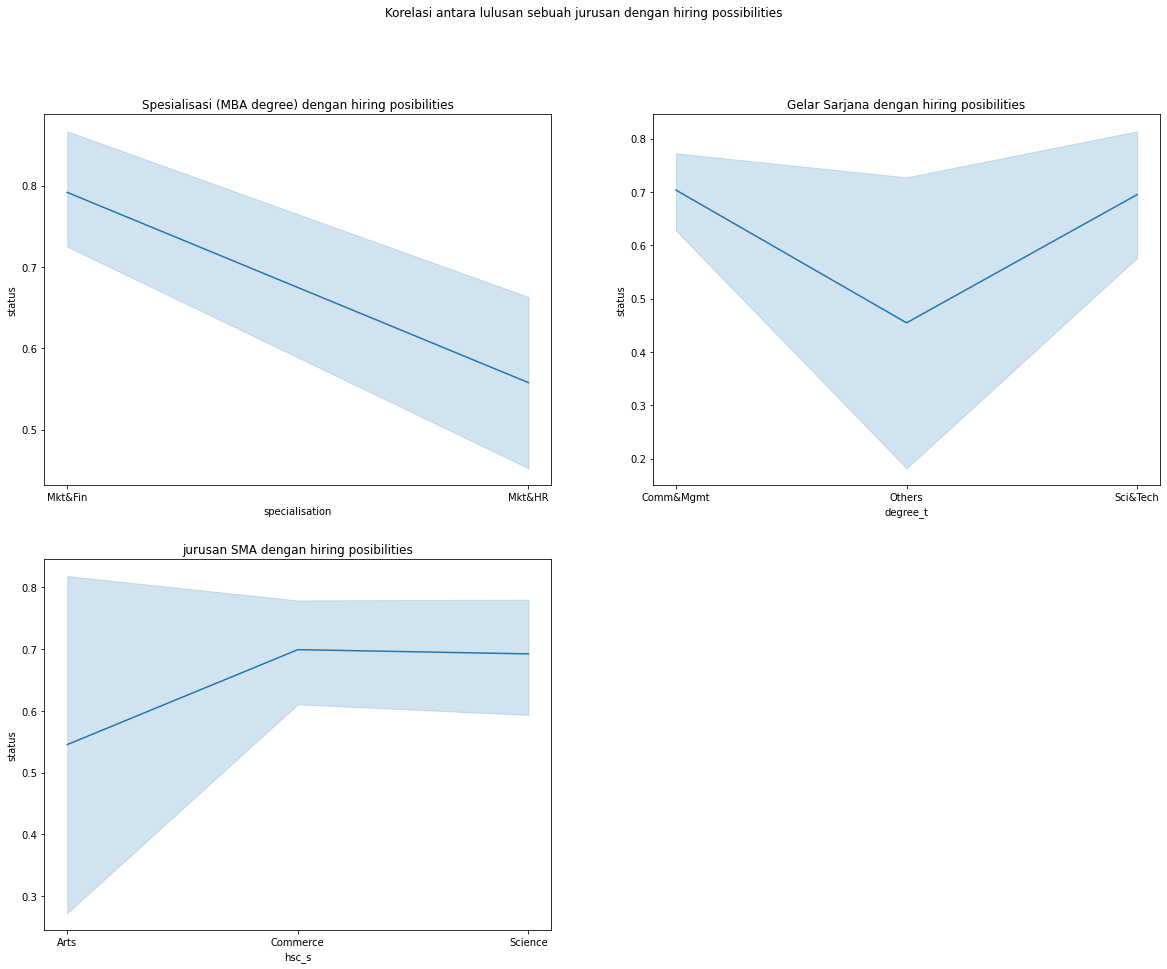

In [12]:
plt.figure(figsize=(20,15))
plt.suptitle('Korelasi antara lulusan sebuah jurusan dengan hiring possibilities')

plt.subplot(2,2,1)
plt.title('Spesialisasi (MBA degree) dengan hiring posibilities')
sns.lineplot(cr['specialisation'],cr['status'])

plt.subplot(2,2,2)
plt.title('Gelar Sarjana dengan hiring posibilities')
sns.lineplot(cr['degree_t'],cr['status'])

plt.subplot(2,2,3)
plt.title('jurusan SMA dengan hiring posibilities')
sns.lineplot(cr['hsc_s'],cr['status'])

# plt.subplot(2,2,4)
# plt.title('SMP Negeri dengan hiring posibilities')
# sns.lineplot(cr['ssc_b'],cr['status'])

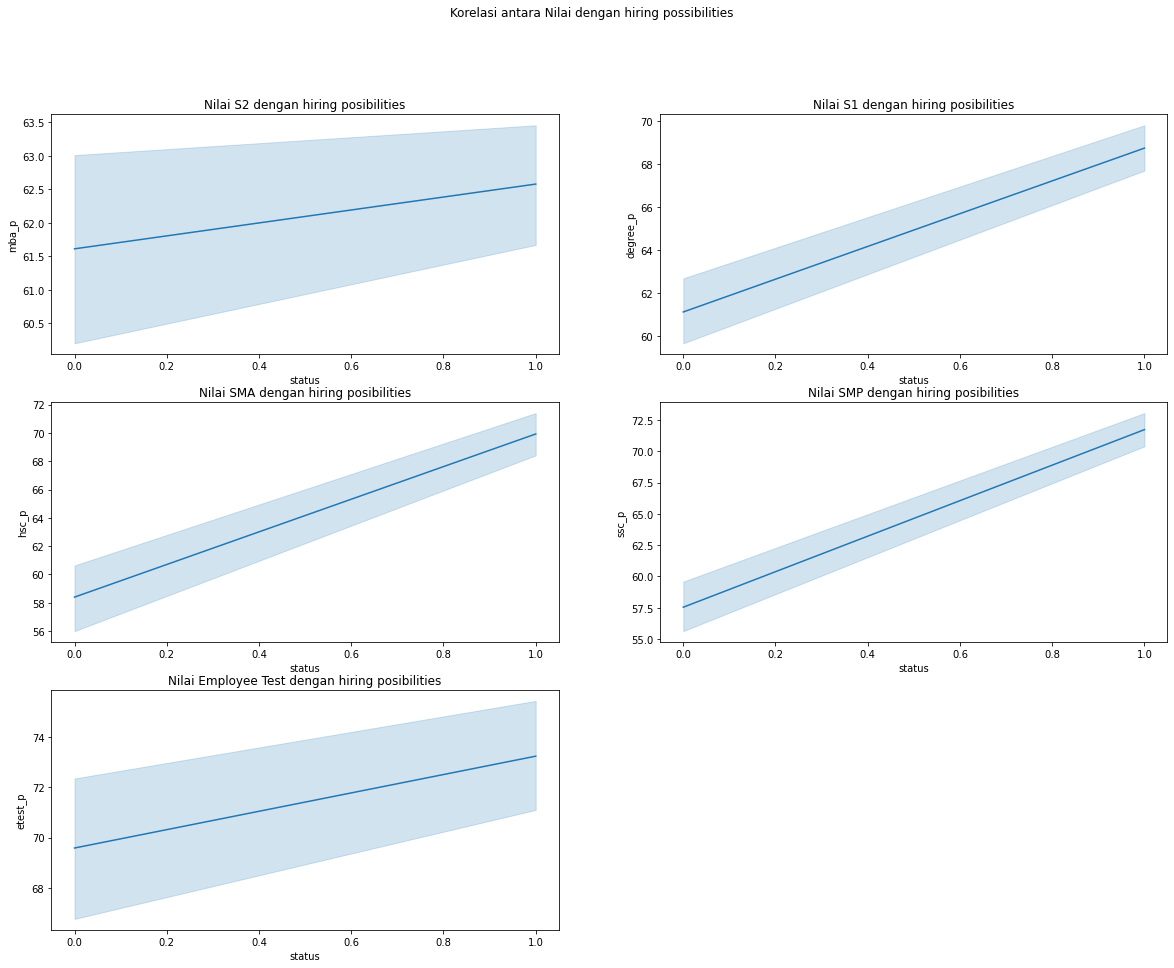

In [25]:
plt.figure(figsize=(20,15))
plt.suptitle('Korelasi antara Nilai dengan hiring possibilities')

plt.subplot(3,2,1)
plt.title('Nilai S2 dengan hiring posibilities')
sns.lineplot(y=cr['mba_p'],x=cr['status'])

plt.subplot(3,2,2)
plt.title('Nilai S1 dengan hiring posibilities')
sns.lineplot(y=cr['degree_p'],x=cr['status'])

plt.subplot(3,2,3)
plt.title('Nilai SMA dengan hiring posibilities')
sns.lineplot(y=cr['hsc_p'],x=cr['status'])

plt.subplot(3,2,4)
plt.title('Nilai SMP dengan hiring posibilities')
sns.lineplot(y=cr['ssc_p'],x=cr['status'])

plt.subplot(3,2,5)
plt.title('Nilai Employee Test dengan hiring posibilities')
sns.lineplot(y=cr['etest_p'],x=cr['status'])

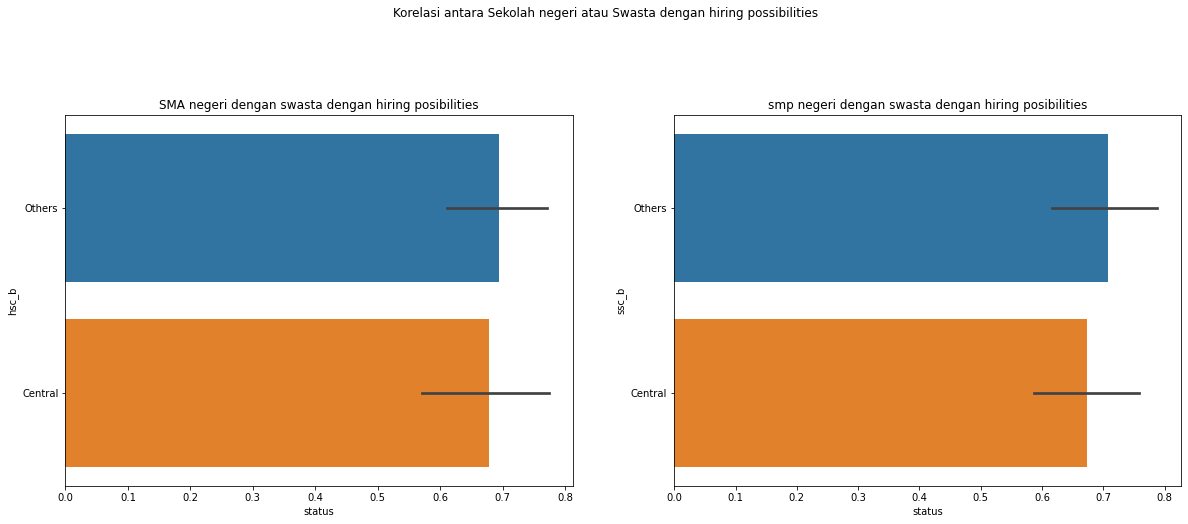

In [14]:
plt.figure(figsize=(20,15))
plt.suptitle('Korelasi antara Sekolah negeri atau Swasta dengan hiring possibilities')

plt.subplot(2,2,1)
plt.title('SMA negeri dengan swasta dengan hiring posibilities')
sns.barplot(y=cr['hsc_b'],x=cr['status'])

plt.subplot(2,2,2)
plt.title('smp negeri dengan swasta dengan hiring posibilities')
sns.barplot(y=cr['ssc_b'],x=cr['status'])

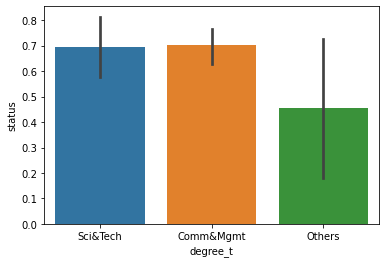

In [15]:
sns.barplot(cr['degree_t'],cr['status'])

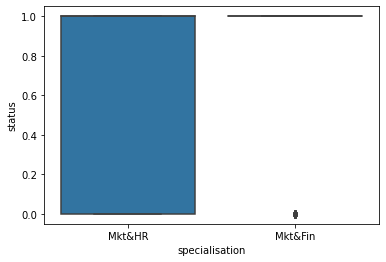

In [26]:
sns.boxplot(cr['specialisation'],cr['status'])

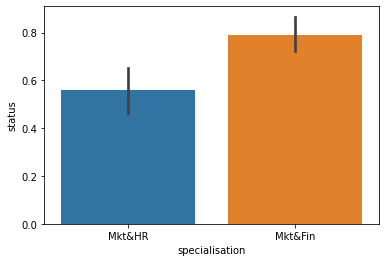

In [17]:
sns.barplot(cr['specialisation'],cr['status'])

(array([15., 19., 37., 35., 36., 31., 18., 14.,  6.,  4.]),
 array([51.21 , 53.878, 56.546, 59.214, 61.882, 64.55 , 67.218, 69.886,
        72.554, 75.222, 77.89 ]),
 <a list of 10 Patch objects>)

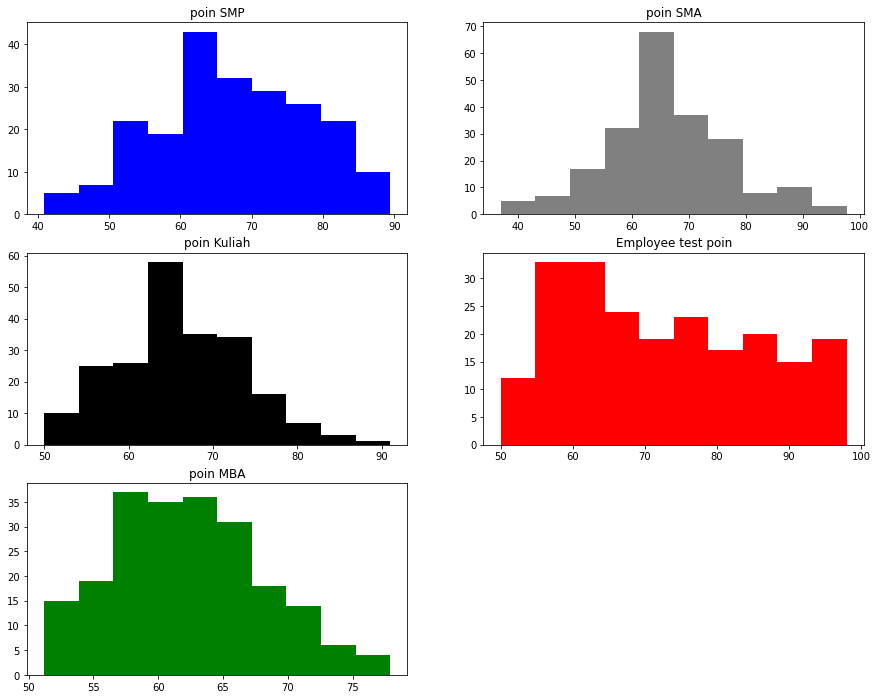

In [23]:
plt.figure(figsize=(15,12))

plt.subplot(321)
plt.title('poin SMP')
plt.hist(cr['ssc_p'],color='blue')
plt.subplot(322)
plt.title('poin SMA')
plt.hist(cr['hsc_p'],color='grey')
plt.subplot(323)
plt.title('poin Kuliah')
plt.hist(cr['degree_p'],color='black')
plt.subplot(324)
plt.title('Employee test poin')
plt.hist(cr['etest_p'],color='red')
plt.subplot(325)
plt.title('poin MBA')
plt.hist(cr['mba_p'],color='green')